In [3]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [5]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [6]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [7]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.3466 - val_loss: 0.2640
Epoch 2/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.2584 - val_loss: 0.2541
Epoch 3/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.2462 - val_loss: 0.2364
Epoch 4/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.2252 - val_loss: 0.2115
Epoch 5/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.2016 - val_loss: 0.1910
Epoch 6/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.1880 - val_loss: 0.1803
Epoch 7/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.1780 - val_loss: 0.1755
Epoch 8/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1710 - val_loss: 0.1668
Epoch 9/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1654 - val_loss: 0.1

In [8]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [9]:
decoded_imgs = autoencoder.predict(x_test)

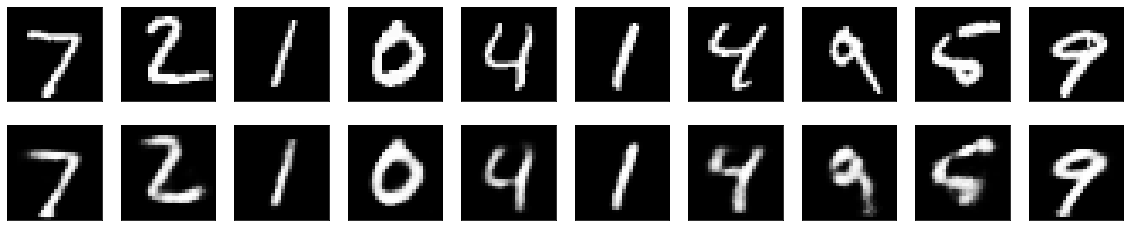

In [11]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()